In [ ]:
from fastai.vision import *
import numpy as np
np.random.seed(42)
import warnings

warnings.simplefilter('ignore')

In [ ]:
# import zipfile as Zipfile
# def extract_data(path):
#   f = path
#   with Zipfile.ZipFile(f, 'r') as zip:

#     print(zip.printdir())

#     print("Extracting files.....")
#     zip.extractall('/content/drive/My Drive/datasets')
# extract_data('/content/drive/My Drive/datasets/PetImages.zip')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drivepath = Path('/content/drive/My Drive/datasets/PetImages')
print(drivepath.ls()[1]," -->",len(drivepath.ls()[1].ls()))
print(drivepath.ls()[2]," -->",len(drivepath.ls()[2].ls()))

print(len(drivepath.ls()))


/content/drive/My Drive/datasets/PetImages/Cat  --> 1500
/content/drive/My Drive/datasets/PetImages/Dog  --> 1500
4


In [ ]:
src = ImageList.from_folder(drivepath).split_subsets(train_size=0.8,valid_size=0.2).label_from_folder()

In [ ]:
x=src.train
x[0][0].data

tensor([[[0.5602, 0.6049, 0.5669,  ..., 0.5537, 0.6032, 0.6510],
         [0.5284, 0.5416, 0.4988,  ..., 0.5224, 0.5413, 0.5283],
         [0.5904, 0.6180, 0.4798,  ..., 0.5830, 0.6184, 0.5314],
         ...,
         [0.5972, 0.6076, 0.5883,  ..., 0.3252, 0.3405, 0.3677],
         [0.6266, 0.5688, 0.5549,  ..., 0.3509, 0.3681, 0.3571],
         [0.5646, 0.5607, 0.5382,  ..., 0.3690, 0.3945, 0.4318]],

        [[0.7253, 0.7842, 0.7565,  ..., 0.6126, 0.6550, 0.6939],
         [0.6412, 0.6777, 0.6264,  ..., 0.6000, 0.6278, 0.6227],
         [0.6943, 0.7507, 0.6078,  ..., 0.6538, 0.6990, 0.6180],
         ...,
         [0.8150, 0.8218, 0.8037,  ..., 0.3531, 0.3684, 0.3955],
         [0.8493, 0.7907, 0.7774,  ..., 0.3787, 0.3959, 0.3849],
         [0.7440, 0.7435, 0.7273,  ..., 0.3969, 0.4228, 0.4633]],

        [[0.3168, 0.3546, 0.3111,  ..., 0.4880, 0.5363, 0.5765],
         [0.3642, 0.3568, 0.3562,  ..., 0.4354, 0.4449, 0.4301],
         [0.4526, 0.4477, 0.3279,  ..., 0.5012, 0.5318, 0.

In [ ]:
def get_data(size,bs):
  return src.transform(tfms=get_transforms(flip_vert=True), size=size).databunch(bs=bs).normalize()

In [ ]:
data = get_data(200,64)

In [ ]:
x,y= data.train_ds[0]
print(x.data)
print(x.data.max())
print(x.data.min())


tensor([[[0.6076, 0.5901, 0.5833,  ..., 0.5279, 0.5804, 0.6065],
         [0.6546, 0.6529, 0.6207,  ..., 0.6050, 0.6090, 0.5902],
         [0.5340, 0.5372, 0.4974,  ..., 0.5652, 0.5932, 0.5698],
         ...,
         [0.6501, 0.6087, 0.7104,  ..., 0.6860, 0.6313, 0.5959],
         [0.6436, 0.5436, 0.6137,  ..., 0.6272, 0.5835, 0.5940],
         [0.7016, 0.6954, 0.6824,  ..., 0.6007, 0.5804, 0.5436]],

        [[0.6486, 0.6357, 0.6341,  ..., 0.6277, 0.6750, 0.7245],
         [0.6915, 0.7003, 0.6769,  ..., 0.7395, 0.7303, 0.7417],
         [0.6400, 0.6314, 0.5905,  ..., 0.6826, 0.7071, 0.6798],
         ...,
         [0.7620, 0.7219, 0.8267,  ..., 0.8411, 0.8012, 0.7786],
         [0.7615, 0.6614, 0.7316,  ..., 0.8356, 0.7958, 0.8074],
         [0.8236, 0.8173, 0.8043,  ..., 0.8108, 0.7927, 0.7558]],

        [[0.5263, 0.5123, 0.5097,  ..., 0.3925, 0.4201, 0.4510],
         [0.5709, 0.5713, 0.5411,  ..., 0.5014, 0.4816, 0.4709],
         [0.4242, 0.4301, 0.4028,  ..., 0.4456, 0.4936, 0.

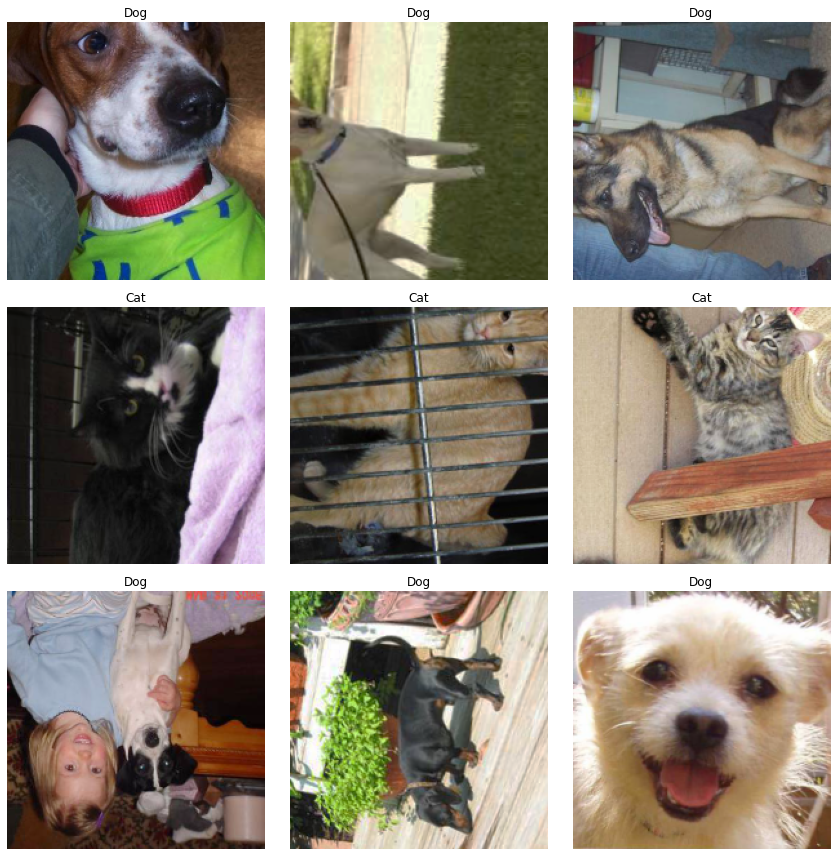

In [ ]:
data.show_batch(rows=3, fig_size=(10,11))

In [ ]:
data

ImageDataBunch;

Train: LabelList (2400 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
Dog,Cat,Dog,Cat,Dog
Path: /content/drive/My Drive/datasets/PetImages;

Valid: LabelList (600 items)
x: ImageList
Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200),Image (3, 200, 200)
y: CategoryList
Cat,Cat,Cat,Cat,Cat
Path: /content/drive/My Drive/datasets/PetImages;

Test: None

torch.Size([3, 200, 200])


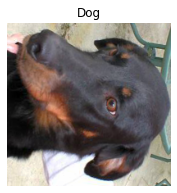

In [ ]:
i = np.random.randint(2400)
x, y = data.train_ds[i]
x.show(y=y)
print(x.shape)

In [ ]:
pretlearn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

In [ ]:
pretlearn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


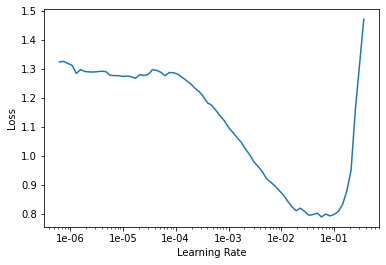

In [ ]:
pretlearn.recorder.plot()

In [ ]:
pretlearn.fit_one_cycle(5,max_lr=slice(1e-03,1e-02))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.478896,0.132313,0.036667,0.963333,02:53
1,0.313780,0.077330,0.030000,0.970000,00:29
2,0.247458,0.038774,0.015000,0.985000,00:30
3,0.193464,0.046145,0.013333,0.986667,00:29
4,0.146567,0.045415,0.016667,0.983333,00:29


In [ ]:
img = open_image(Path('/content/cci.jpg'))
c,i,p=pretlearn.predict(img)
print(data.classes[i])

Cat


In [ ]:
interp = ClassificationInterpretation.from_learner(pretlearn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

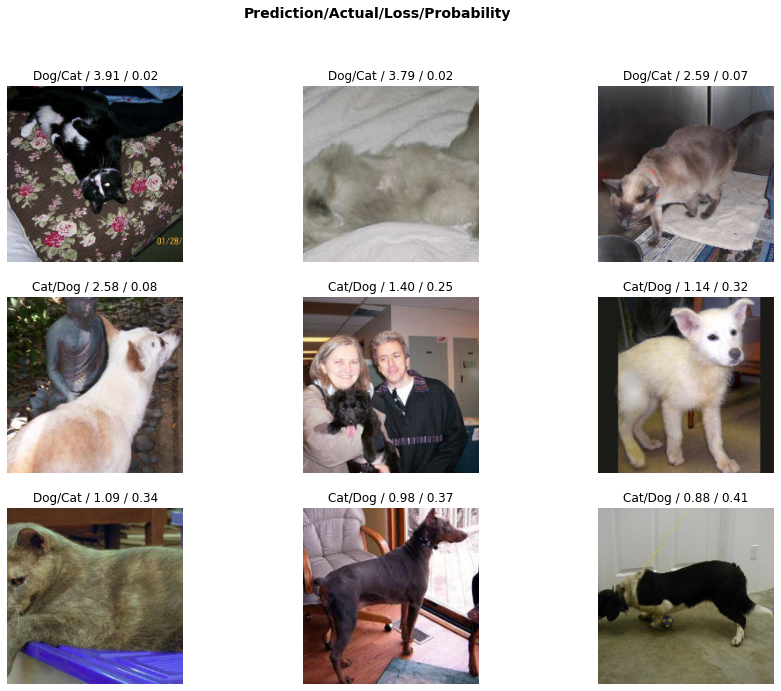

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))


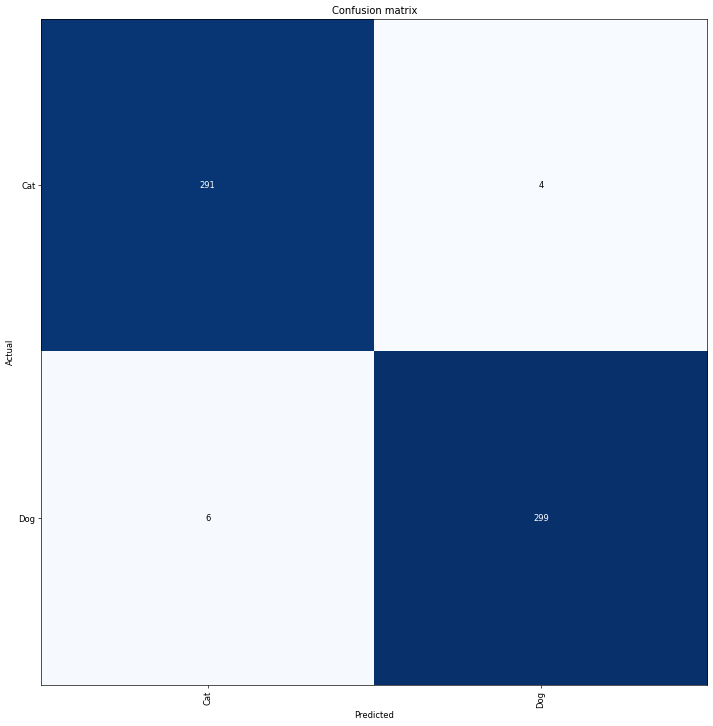

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [ ]:
pretlearn.unfreeze()

In [ ]:
pretlearn.fit_one_cycle(2,max_lr=0.00001)

In [ ]:
pretlearn.lr_find()

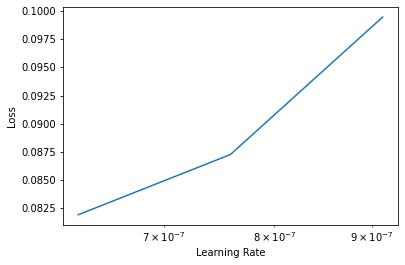

In [ ]:
pretlearn.recorder.plot()

In [ ]:
#Implementing Convolutional Neural network from Scratch
from torch.nn import *

In [ ]:
def ConvLayer(ni, nf, strides=2, kernel=3, padding=1):

  return nn.Sequential(conv2d(ni,nf, ks=kernel, stride=strides, padding=padding),
                        ReLU(),
                       BatchNorm2d(nf))

In [ ]:
myresnetModel = Sequential(
                          ConvLayer(3,16),
                          
                          ConvLayer(16,24),
                     
                          ConvLayer(24,32),
                        

                          ConvLayer(32,64),
                      

                          ConvLayer(64,72),
                         

                          ConvLayer(72,96),
                       

                          ConvLayer(96,104),
                                                   
                          ConvLayer(104,96),
                           
                          ConvLayer(96,88),
                          ConvLayer(88,80),
                          ConvLayer(80,72),
                          ConvLayer(72,64),
                          ConvLayer(64,32),
                          ConvLayer(32,24),
                          ConvLayer(24,2),
                          Flatten()
                  )

In [ ]:
learn = Learner(data, myresnetModel,loss_func=CrossEntropyLoss(), metrics=[error_rate,accuracy])
print(learn.summary())

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


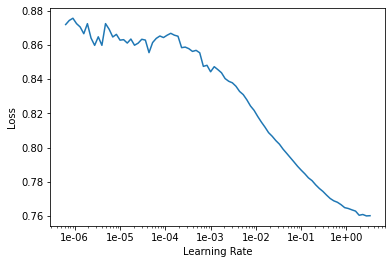

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1e-02))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.783263,0.714681,0.498333,0.501667,00:29
1,0.726484,0.701524,0.486667,0.513333,00:29
2,0.707902,0.690473,0.508333,0.491667,00:29
3,0.699760,0.687693,0.450000,0.550000,00:29
4,0.694768,0.684235,0.441667,0.558333,00:29
5,0.689039,0.668810,0.396667,0.603333,00:29
6,0.672737,0.659087,0.391667,0.608333,00:30
7,0.665062,0.671986,0.403333,0.596667,00:30
8,0.654379,0.636124,0.361667,0.638333,00:29
9,0.644437,0.635532,0.365000,0.635000,00:30


In [ ]:
img = open_image(Path('/content/dd2.jpg'))
c,i,p=pretlearn.predict(img)
print(data.classes[i])

Cat


In [ ]:
#Resnet

In [ ]:
class resnet(nn.Module):
  def __init__(self, nf):
    super.__ini__()
    self.c1 = conv2d(nf,nf)
    self.c2 = conv2d(nf,nf)
  
  def forward(self,x):
    return x + self.c2(self.c1(x))

In [ ]:
model = nn.Sequential(
      ConvLayer(3,16),
                          
                          ConvLayer(16,24),
                          res_block(24),
                          ConvLayer(24,32),
                                                  res_block(32),


                          ConvLayer(32,64),
                                                res_block(64),


                          ConvLayer(64,72),
                         
                          res_block(72),

                          ConvLayer(72,96),
                       
                          res_block(96),

                          ConvLayer(96,104),
                                                                  res_block(104),
           
                          ConvLayer(104,96),
                                                     res_block(96),

                          ConvLayer(96,88),
                                                res_block(88),

                          ConvLayer(88,80),
                                                res_block(80),

                          ConvLayer(80,72),
                                                res_block(72),
                      

                          ConvLayer(72,64),
                                                res_block(64),

                          ConvLayer(64,32),
                                                res_block(32),

                          ConvLayer(32,24),
                                                res_block(24),

                          ConvLayer(24,2),
    Flatten()
)

In [ ]:
rlearn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


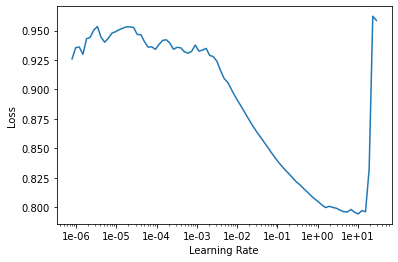

In [ ]:
rlearn.lr_find(end_lr=100)
rlearn.recorder.plot()

In [ ]:
rlearn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.692250,0.697140,0.486667,00:31
1,0.692617,0.697350,0.471667,00:31


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fa12de91a90>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 942, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7fa12b465be0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/usr/local/l